In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from graphs import Graph
from scipy.optimize import broyden1

## DFS Testing

In [2]:
r = 100
n = 1000
zs = np.linspace(0.1, 4, num=25)
empS = np.zeros(zs.shape)
emps = np.zeros(zs.shape)

for i in tqdm(range(zs.shape[0])):
    p = zs[i]/(n-1)
    for trial in range(r):
        G = Graph(n, p)
        forest = G.DFS()

        # Compute desired quantities
        giantsz = max(forest.values())  # sz of giant component
        empS[i] += giantsz/(n*r)  # fraction of vertices in giant component

        # Average size of non-giant components
        u = [k for k, v in forest.items() if v != giantsz]  # all non-giant roots
        emps[i] += sum([forest[k] for k in u])/(len(u)*r)


100%|██████████| 25/25 [48:47<00:00, 117.09s/it]


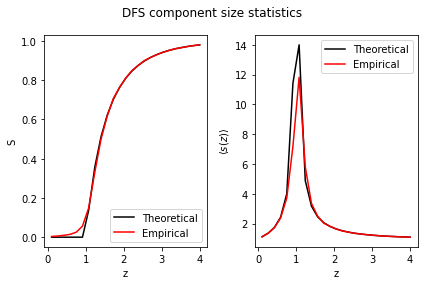

In [9]:
Sfun = lambda S :  1 - S - np.exp(-zs*S)
theoreticalS = broyden1(Sfun, np.ones(zs.shape))
theoreticals = 1/(1 - zs + zs*theoreticalS)

_, (ax1, ax2) = plt.subplots(ncols=2)
ax1.plot(zs, theoreticalS, 'k', zs, empS, 'r')
ax1.set_xlabel('z')
ax1.set_ylabel('S')
ax1.legend(['Theoretical', 'Empirical'])

ax2.plot(zs, theoreticals, 'k', zs, emps, 'r')
ax2.set_xlabel('z')
ax2.set_ylabel(r'$\langle s(z)\rangle$')
ax2.legend(['Theoretical', 'Empirical'])

plt.suptitle('DFS component size statistics')
plt.tight_layout()
plt.savefig('dfsstats.png')
plt.show()

In [19]:
(1/(1 - zs + zs * theoreticalS)).shape

(25,)

## BFS Testing

In [ ]:
z = 4
r = 100
qs = np.array([10, 11, 12, 13])

for n in 2**qs:
    p = z/(n-1)
    G = Graph(n, p)
    seeds = np.random.choice(G.vertices, size=(r,), replace=False)

    for s in seeds:
        BFS(G, s)
